## Proportion of Undernourished in the population (malnutrition %)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Dataset

In [41]:
df = pd.read_csv('/Users/aathik/Documents/Uwin/ADT/Project/Notebooks2/PROJECT-ADT/Undernourished.csv')

#### Preprocessing the dataset

In [42]:
df.head(10)

,Country,'00–'02,'05–'07,'11–'13,'18–'20
0,Afghanistan,47.8,33.3,28.2,25.6
1,Albania,4.9,8.8,3.5,3.9
2,Algeria,8,6.4,3.3,<2.5
3,Angola,67.5,49.3,16.3,17.3
4,Argentina,3,3.4,3.1,3.9
5,Armenia,26.1,9.3,3.6,3.4
6,Azerbaijan,17,2.8,<2.5,<2.5
7,Bahrain,—,—,—,—
8,Bangladesh,15.9,13.8,15.5,9.7
9,Belarus,<2.5,<2.5,<2.5,<2.5


In [43]:
df.rename(columns={" '00–'02": '2000', " '05–'07": '2006', " '11–'13": '2012', " '18–'20": '2021'}, inplace=True)
df.head()

,Country,2000,2006,2012,2021
0,Afghanistan,47.8,33.3,28.2,25.6
1,Albania,4.9,8.8,3.5,3.9
2,Algeria,8,6.4,3.3,<2.5
3,Angola,67.5,49.3,16.3,17.3
4,Argentina,3,3.4,3.1,3.9


In [44]:
df.columns

Index(['Country', '2000', '2006', '2012', '2021'], dtype='object')

In [45]:
df.replace('—', float('nan'), inplace=True)

In [46]:
df.isnull().sum()

Country     0
2000       21
2006       19
2012       19
2021       19
dtype: int64

In [47]:
df.replace("<5", 4, inplace=True)
df.replace("<2.5", 1.5, inplace=True)
df.head(10)

,Country,2000,2006,2012,2021
0,Afghanistan,47.8,33.3,28.2,25.6
1,Albania,4.9,8.8,3.5,3.9
2,Algeria,8,6.4,3.3,1.5
3,Angola,67.5,49.3,16.3,17.3
4,Argentina,3,3.4,3.1,3.9
5,Armenia,26.1,9.3,3.6,3.4
6,Azerbaijan,17,2.8,1.5,1.5
7,Bahrain,NaN,NaN,NaN,NaN
8,Bangladesh,15.9,13.8,15.5,9.7
9,Belarus,1.5,1.5,1.5,1.5


In [48]:
df['2000'] = df['2000'].astype(float)
df['2006'] = df['2006'].astype(float)
df['2012'] = df['2012'].astype(float)
df['2021'] = df['2021'].astype(float)
cols_to_fill = ['2000', '2006', '2012', '2021']
df[cols_to_fill] = df[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)

In [49]:
df.isnull().sum()

Country     0
2000       19
2006       19
2012       19
2021       19
dtype: int64

In [50]:
#Countries for Analysis
countries_to_filter = [
    "Tunisia", "Algeria", "Morocco", "Cabo Verde", "Mauritius", "Democratic Republic of the Congo",
    "Chad", "Central African Republic", "Burundi", "Comoros", "South Sudan", "Syrian Arab Republic",
    "Somalia", "China", "Kuwait", "Turkey", "Uzbekistan", "Mongolia", "Korea (DPR)", "India",
    "Afghanistan", "Timor-Leste", "Yemen", "Belarus", "Bosnia & Herzegovina", "Croatia",
    "Estonia", "Latvia", "Bulgaria", "Albania", "Russian Federation", "Ukraine", "Moldova (Republic of)",
    "Cuba", "Costa Rica", "Dominican Republic", "Mexico", "Jamaica", "Trinidad & Tobago",
    "Honduras", "Nicaragua", "Guatemala", "Haiti", "Fiji", "Solomon Islands", "Papua New Guinea",
    "Brazil", "Chile", "Uruguay", "Argentina", "Paraguay", "Suriname", "Guyana",
    "Bolivia (Plurinat. State of)", "Ecuador", "Venezuela"
]
filtered_df = df[df['Country'].isin(countries_to_filter)].copy()

numeric_columns = ['2000', '2006', '2012', '2021']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
filtered_df.head()


,Country,2000,2006,2012,2021
0,Afghanistan,47.8,33.3,28.2,25.6
1,Albania,4.9,8.8,3.5,3.9
2,Algeria,8.0,6.4,3.3,1.5
4,Argentina,3.0,3.4,3.1,3.9
9,Belarus,1.5,1.5,1.5,1.5


#### Analysis 

###### Analysis of Countries in each Continent

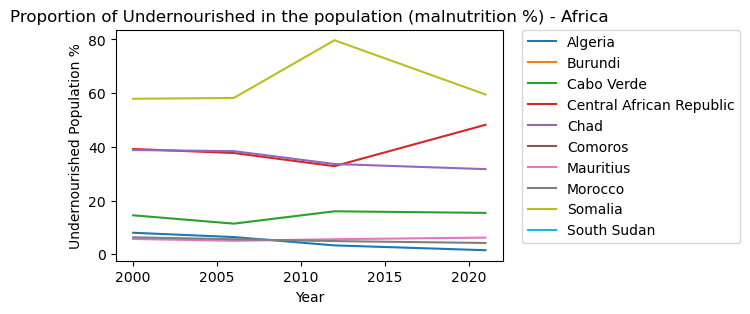

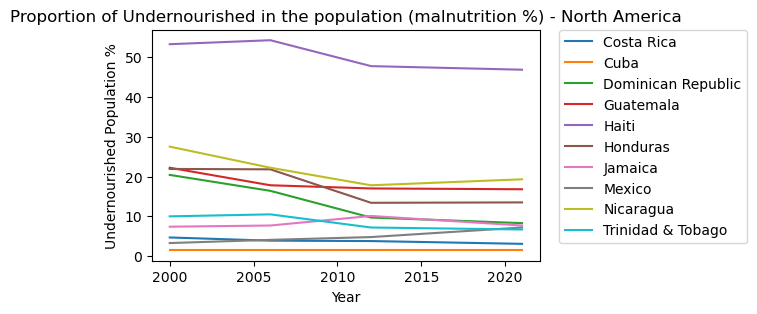

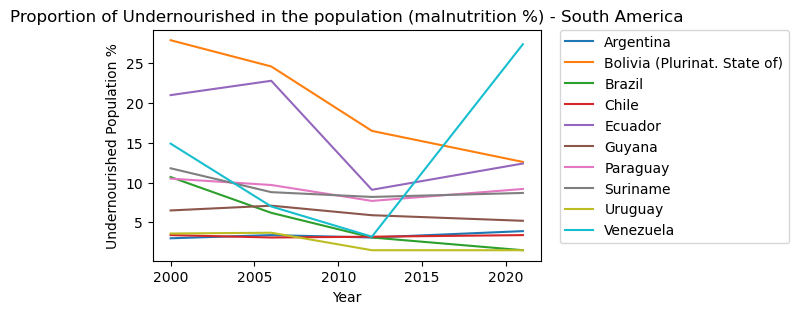

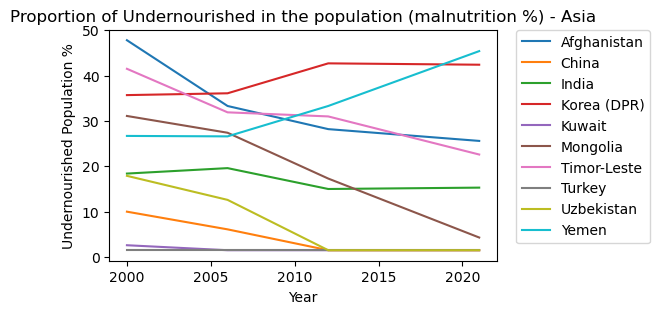

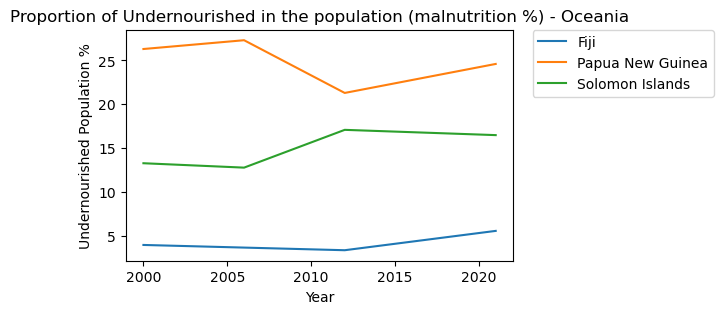

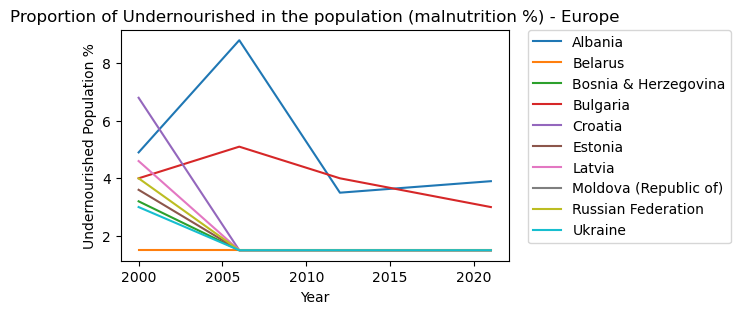

In [51]:
# Make a copy
contintent_df = filtered_df.copy()

#Create a dictionary to map the countries to continents
continent_mapping = {
    'Africa': ['Algeria', 'Morocco', 'Cabo Verde', 'Mauritius', 'Democratic Republic of the Congo',
               'Chad', 'Central African Republic', 'Burundi', 'Comoros', 'South Sudan', 'Somalia'],
    'North America': ['Mexico', 'Jamaica', 'Trinidad & Tobago', 'Honduras', 'Nicaragua', 'Haiti',
                      'Cuba', 'Costa Rica', 'Dominican Republic', 'Guatemala'],
    'South America': ['Brazil', 'Venezuela', 'Suriname', 'Guyana',
                      'Bolivia (Plurinat. State of)', 'Ecuador','Chile','Uruguay','Argentina','Paraguay'],
    'Asia': ['China', 'Kuwait', 'Turkey', 'Uzbekistan', 'Mongolia', 'Korea (DPR)', 'India',
             'Afghanistan', 'Timor-Leste', 'Yemen'],
    'Oceania': ['Fiji', 'Solomon Islands', 'Papua New Guinea'],
    'Europe': ['Belarus', 'Bosnia & Herzegovina', 'Croatia', 'Estonia', 'Latvia', 'Bulgaria',
               'Albania', 'Russian Federation', 'Ukraine', 'Moldova (Republic of)']
}


for continent, countries in continent_mapping.items():
    continent_df = filtered_df[filtered_df['Country'].isin(countries)]

    ghi_df = continent_df[['Country', '2000', '2006', '2012', '2021']].copy()

    # Melt the DataFrame to gather all years into a single column
    ghi_df = ghi_df.melt(id_vars='Country', var_name='Year', value_name='GHI Score')

    # Convert 'Year' column to numeric data type
    ghi_df['Year'] = ghi_df['Year'].astype(int)
    


    # Line plot for GHI Scores over time for each country in the continent
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='Year', y='GHI Score', hue='Country', data=ghi_df, palette='tab10')
    plt.title(f'Proportion of Undernourished in the population (malnutrition %) - {continent}')
    plt.xlabel('Year')
    plt.ylabel('Undernourished Population %')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


###### Analysis based on the Continents

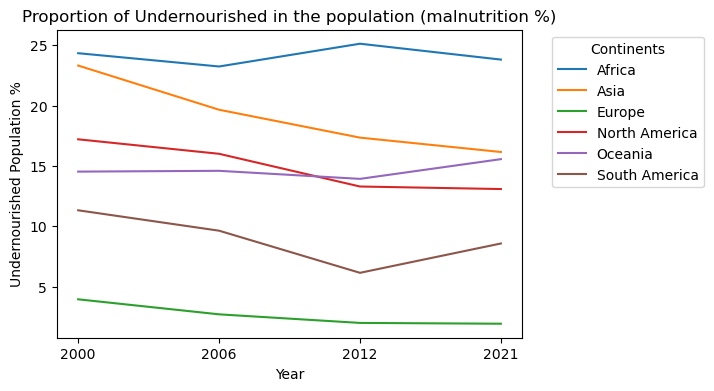

In [52]:
cont_analysis_df = filtered_df.copy()
cont_analysis_df['Continent'] = cont_analysis_df['Country'].map(lambda country: next((continent for continent, countries in continent_mapping.items() if country in countries), 'Unknown'))
cont_analysis_df = cont_analysis_df[cont_analysis_df['Continent'] != 'Unknown']
#print(cont_analysis_df)

years = ['2000', '2006', '2012', '2021']
cont_analysis_df[years] = cont_analysis_df[years].apply(pd.to_numeric)

# Group the DataFrame by 'Continent' and calculate the mean values for each year
continent_mean_df = cont_analysis_df.groupby('Continent')[years].mean()

# Transpose the DataFrame to get years as columns and continents as rows
continent_mean_df = continent_mean_df.T

# Plot the line chart
plt.figure(figsize=(6, 4))
for continent in continent_mean_df.columns:
    plt.plot(years, continent_mean_df[continent], label=continent)
    

plt.title('Proportion of Undernourished in the population (malnutrition %)')
plt.xlabel('Year')
plt.ylabel('Undernourished Population %')
plt.legend(title='Continents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()